# Weekly project part 1
Using the image "appletree.jpg"
1) Can you segment the apples from the tree?
2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)
3) Can you change the color of one of them?
4) Can you segment the leaves?
    
    
# Weekly project part 2
1) Remove the greenscreen and replace the background in "itssp.png".
2) Can you improve the edge with eroding/dilating?


In [52]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

In [53]:
path = "appletree.jpg"

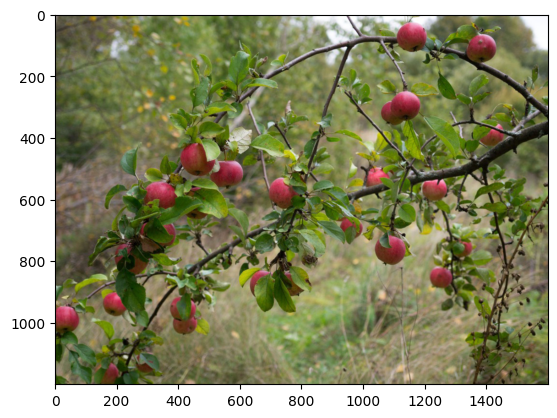

In [54]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

In [50]:

# Find round red objects in the image using HoughCircles

gray = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                            param1=50, param2=30, minRadius=30, maxRadius=70)

circles = cv2.HoughCircles

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(bgr_img,(i[0],i[1]),i[2],(255,0,0),2)

plt.imshow(bgr_img)







TypeError: loop of ufunc does not support argument 0 of type builtin_function_or_method which has no callable rint method

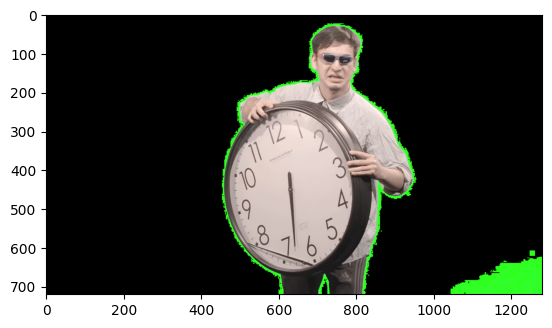

In [56]:
# Remove the greenscreen in image ittsp.png

import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

path = "ittsp.png"

bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

(R, G, B) = image[100, 50]

# Remove RGB from the image
image[np.where((image == [R, G, B]).all(axis = 2))] = [0, 0, 0]
plt.imshow(image)


In [62]:
import cv2
import numpy as np
import skimage.exposure

# load image
img = cv2.imread('ittsp.png')

# convert to LAB
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)

# extract A channel
A = lab[:,:,1]

# threshold A channel
thresh = cv2.threshold(A, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# blur threshold image
blur = cv2.GaussianBlur(thresh, (0,0), sigmaX=5, sigmaY=5, borderType = cv2.BORDER_DEFAULT)

# stretch so that 255 -> 255 and 127.5 -> 0
mask = skimage.exposure.rescale_intensity(blur, in_range=(127.5,255), out_range=(0,255)).astype(np.uint8)

# add mask to image as alpha channel
result = img.copy()
result = cv2.cvtColor(img,cv2.COLOR_BGR2BGRA)
result[:,:,3] = mask

# save output
cv2.imwrite('greenscreen_thresh.png', thresh)
cv2.imwrite('greenscreen_mask.png', mask)
cv2.imwrite('greenscreen_antialiased.png', result)

# Display various images to see the steps
cv2.imshow('A',A)
cv2.imshow('thresh', thresh)
cv2.imshow('blur', blur)
cv2.imshow('mask', mask)
cv2.imshow('result', result)

cv2.waitKey(0)
cv2.destroyAllWindows()